In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# mnist 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

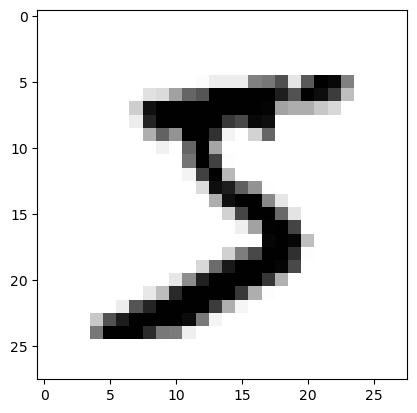

In [3]:
plt.imshow(x_train[0], cmap = "gray_r")
plt.show()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train[0]

5

In [10]:
np.unique(y_train, return_counts = True) # 종속변수 개수 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [6]:
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255
scaled_test = x_test.reshape(-1,  28, 28, 1) / 255

# 합성곱 신경망 설정

In [20]:
model = keras.Sequential()

In [21]:
# 은닉층
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation="relu",
                             input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation="relu"))
model.add(keras.layers.MaxPool2D(2))

# 은닉층 결과도출
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam",
             metrics = ["accuracy"])

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights= True)

In [24]:
x_sub, x_val, y_sub, y_val = train_test_split(scaled_train, y_train, test_size = 0.2,
                                             stratify= y_train, random_state = 12)

In [37]:
scaled_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [25]:
history = model.fit(x_sub, y_sub, validation_data=(x_val, y_val), epochs = 30,
                   callbacks = [early_stopping_cb])

Epoch 1/30
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2182 - accuracy: 0.9328 - val_loss: 0.0608 - val_accuracy: 0.9814
Epoch 2/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0823 - accuracy: 0.9750 - val_loss: 0.0456 - val_accuracy: 0.9858
Epoch 3/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0607 - accuracy: 0.9811 - val_loss: 0.0369 - val_accuracy: 0.9887
Epoch 4/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0392 - val_accuracy: 0.9880
Epoch 5/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0429 - val_accuracy: 0.9872
Epoch 6/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0365 - val_accuracy: 0.9890
Epoch 7/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0353 - val_ac

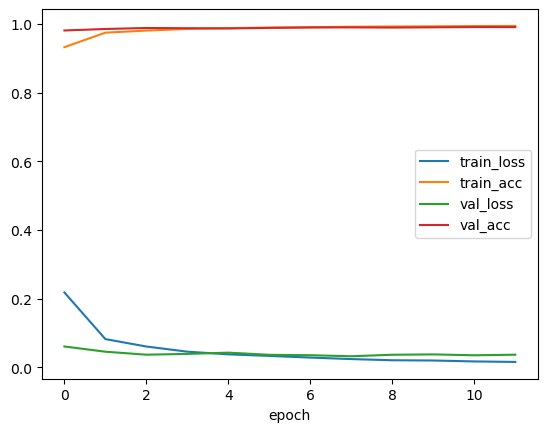

In [26]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")


plt.legend()
plt.xlabel("epoch")
plt.show()

In [27]:
model.evaluate(scaled_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.9922


[0.026631558313965797, 0.9922000169754028]

In [28]:
preds = model.predict(scaled_test)

313/313 [==============================] - 1s 3ms/step


In [29]:
preds.shape

(10000, 10)

In [30]:
preds[0]

array([4.7989801e-10, 4.3456058e-08, 3.5683168e-08, 7.7999847e-09,
       1.2589389e-07, 1.4765534e-12, 5.5406301e-15, 9.9999189e-01,
       9.2146651e-11, 7.9137135e-06], dtype=float32)

In [31]:
pred_arr = np.argmax(preds, axis = 1)

In [32]:
pred_arr

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
x_match = []

for idx, item in enumerate(pred_arr):
    if item != y_test[idx]:
        x_match.append(idx)

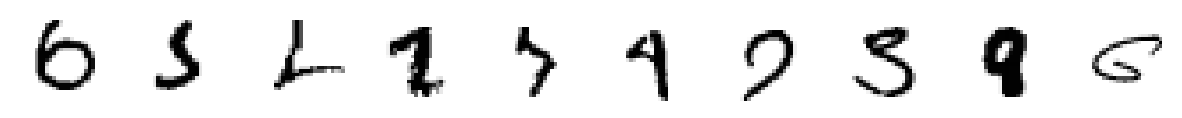

In [35]:
fig, axs = plt.subplots(1, 10, figsize = (15, 15))

for i, item in enumerate(x_match[:10]):
    axs[i].imshow(x_test[item], cmap = "gray_r")
    axs[i].axis("off")
    
plt.show()

In [36]:
y_test[x_match[:10]]

array([6, 5, 2, 2, 7, 4, 7, 3, 8, 6], dtype=uint8)